# Дашборд для Яндекс.Дзен

## Задача

Создать дашборд по макету и ответить на вопросы менеджеров Яндекс.Дзена. Карточка статьи определена своей темой и источником (у которого также есть тема). Пользователи характеризуются возрастной категорией.

Краткое ТЗ:
- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
- Характер данных:
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица *log_raw*);
- База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД *zen*;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

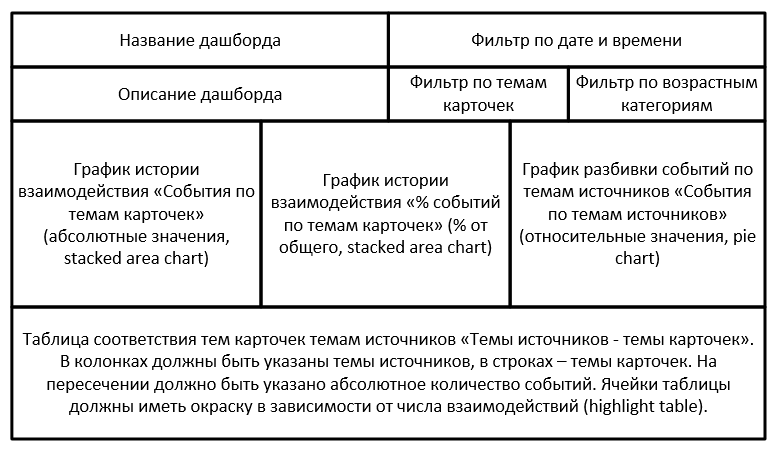

## Ход работы

#### Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
from sqlalchemy import create_engine

#### Создадим коннекцию к базе.

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-zen-project-db' # название базы данных
}

connection_string = (
    'postgresql://{}:{}@{}:{}/{}'
    .format(
        db_config['user'],
        db_config['pwd'],
        db_config['host'],
        db_config['port'],
        db_config['db']
    )
)

engine = create_engine(connection_string)

#### Коннекция к базе хранится в переменной *engine*. Выполним SQL-запрос.

In [3]:
query = (
    '''
    select *
    from dash_visits
    ;
    '''
)

dash_visits = pd.io.sql.read_sql(query, con = engine)
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


#### Выгрузим данные из таблицы *dash_visits* в файл *dash_visits.csv*.

In [4]:
dash_visits.to_csv('dash_visits.csv', index=False, sep='\t')

#### В *Tableau Public* на основе файла *dash_visits.csv* сформируем дашборд в соответствии с макетом.

<a href='https://public.tableau.com/views/Yandex_ZenDashboard_16181743320130/_?:language=en&:display_count=y&publish=yes&:origin=viz_share_link'>Ссылка на дашборд</a>

#### Ответим на вопросы менеджеров, используя дашборд.

*Вопрос*: Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?

*Ответ*: 

Самые популярные темы за период (число событий, % от общего числа):
- Наука (21 736, 7.01%)
- Отношения (20 666, 6.66%)
- Интересные факты (19 942, 6.43%)

Наименее популярные темы за период:
- Знаменитости (7 394, 2.38%)
- Шоу (7 511, 2.42%)
- Женская психология (7 737, 2.49%)

***

*Вопрос*: Как много карточек генерируют источники с разными темами?

*Ответ*: 

Самые популярные источники за период (число событий, % от общего числа):
- Семейные отношения (33 309, 10.74%)
- Россия (29 831, 9.62%)
- Полезные советы (27 412, 8.84%)

Наименее популярные темы за период:
- Финансы (2 628, 0.85%)
- Музыка (2 869, 0.92%)
- Строительство (3000, 0.97%)

***

*Вопрос*: Как соотносятся темы карточек и темы источников?

*Ответ*: 

Самые популярные соответствия «тема – источник» за период (число событий):
- «Рассказы – Путешествия» (4 587)
- «Общество – Россия» (3 471)
- «Наука – Кино» (3 279)

Наименее популярные соответствия «тема – источник» за период:
- «Шоу – Еда» (1)
- «Рассказы – Технологии» (1)
- «Знаменитости – Ремонт» (3)

Несовместимые темы и источники за период:
- «Шоу – Сад и дача»
- «Шоу – Сделай сам»
- «Шоу – Технологии»
- «Женская психология – Интерьеры»
- «Женская психология – Строительство»
- «Скандалы – Строительство» 